In [1]:
import shlex, subprocess
import numpy as np

import matplotlib.pyplot as plt

In [26]:
def run_shell_command(cmdline, output=True):
    print("run shell command: ", cmdline, "\n")
    args = shlex.split(cmdline)
    # let's use the new run command
    p = subprocess.run(args, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    if output:
        print(p.stdout.decode('utf-8'))
        return p.stderr

In [27]:
p = run_shell_command('ls', output=True)

run shell command:  ls 

1d_band_structure.ipynb
2d_band_structure.ipynb
ebt617e_env.yml
ebt617e_ex1.ipynb
h2
h2_quantum_espresso.ipynb
hw2_ebt617e.aux
hw2_ebt617e.log
hw2_ebt617e.out
hw2_ebt617e.pdf
hw2_ebt617e.tex
hydrogen-wave-function.ipynb
LICENSE
README.md
spec-file_ebt617e_env.txt



In [16]:
def create_input(d=1, inputfile="h2/h2.in"):
    filedata = f"""
    &control
    calculation = 'scf'
    prefix = 'h2'
    pseudo_dir = '/usr/share/espresso/pseudo/'
    /
    &system
        ibrav=1, celldm(1) =20, 
        nat=2, ntyp=1,
        ecutwfc=10.0
    /
    &electrons
        conv_thr=1e-6
    /
    &ions
        ion_dynamics='bfgs'
    /
    ATOMIC_SPECIES
     H  1.00784  H.blyp-vbc.UPF
    ATOMIC_POSITIONS (angstrom)
     H 0.00 0.00 0.00
     H {d:.2} 0.00 0.00
    K_POINTS (automatic)
      1 1 1 0 0 0 
    """
    
    # Write out the file to be compiledb
    with open(inputfile, 'w') as file:
        file.write(filedata)
    
    return

In [17]:
create_input(d=1.1)

In [18]:
!cat h2/h2.in


    &control
    calculation = 'scf'
    prefix = 'h2'
    pseudo_dir = '/usr/share/espresso/pseudo/'
    /
    &system
        ibrav=1, celldm(1) =20, 
        nat=2, ntyp=1,
        ecutwfc=10.0
    /
    &electrons
        conv_thr=1e-6
    /
    &ions
        ion_dynamics='bfgs'
    /
    ATOMIC_SPECIES
     H  1.00784  H.blyp-vbc.UPF
    ATOMIC_POSITIONS (angstrom)
     H 0.00 0.00 0.00
     H 1.1 0.00 0.00
    K_POINTS (automatic)
      1 1 1 0 0 0 
    

In [52]:
subprocess?

Type:        module
String form: <module 'subprocess' from '/home/subasi/miniconda3/envs/ebt517e/lib/python3.9/subprocess.py'>
File:        ~/miniconda3/envs/ebt517e/lib/python3.9/subprocess.py
Docstring:  
Subprocesses with accessible I/O streams

This module allows you to spawn processes, connect to their
input/output/error pipes, and obtain their return codes.

For a complete description of this module see the Python documentation.

Main API
run(...): Runs a command, waits for it to complete, then returns a
          CompletedProcess instance.
Popen(...): A class for flexibly executing a command in a new process

Constants
---------
DEVNULL: Special value that indicates that os.devnull should be used
PIPE:    Special value that indicates a pipe should be created
STDOUT:  Special value that indicates that stderr should go to stdout


Older API
call(...): Runs a command, waits for it to complete, then returns
    the return code.
check_call(...): Same as call() but raises CalledProces

In [67]:
def run_quantum_espresso(cmdline):
    print("run command: ", cmdline, "\n")
    args = shlex.split(cmdline)
    # let's use the new run command
    p = subprocess.run(args, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, cwd="h2/")
    return p

In [68]:
infile = 'h2.in'

cmdline = '/usr/bin/pw.x -inp '+ infile

In [69]:
cmdline

'/usr/bin/pw.x -inp h2.in'

In [71]:
out = run_quantum_espresso(cmdline)

run command:  /usr/bin/pw.x -inp h2.in 



In [81]:
outstr = out.stdout.decode()

In [107]:
print( outstr )


     Program PWSCF v.6.4.1 starts on 31Mar2021 at 15:14: 6 

     This program is part of the open-source Quantum ESPRESSO suite
     for quantum simulation of materials; please cite
         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);
         "P. Giannozzi et al., J. Phys.:Condens. Matter 29 465901 (2017);
          URL http://www.quantum-espresso.org", 
     in publications or presentations arising from this work. More details at
     http://www.quantum-espresso.org/quote

     Parallel version (MPI), running on     1 processors

     MPI processes distributed on     1 nodes
     Reading input from h2.in

     Current dimensions of program PWSCF are:
     Max number of different atomic species (ntypx) = 10
     Max number of k-points (npk) =  40000
     Max angular momentum in pseudopotentials (lmaxx) =  3

     Subspace diagonalization in iterative solution of the eigenvalue problem:
     a serial algorithm will be used


     G-vector sticks info
     -------

In [84]:
import re

In [128]:
float(re.search("!    total energy              =      (.*)Ry", outstr).group(0).split()[-2])

-2.13515531

In [130]:
dlist = np.linspace(0.4,1.,11)

infile = 'h2.in'

cmdline = '/usr/bin/pw.x -inp '+ infile

elist=[]
for d in dlist:
    create_input(d=d)
    out = run_quantum_espresso(cmdline)
    outstr = out.stdout.decode()
    energy = float(re.search("!    total energy              =      (.*)Ry", outstr).group(0).split()[-2])
    elist.append(energy)

run command:  /usr/bin/pw.x -inp h2.in 

run command:  /usr/bin/pw.x -inp h2.in 

run command:  /usr/bin/pw.x -inp h2.in 

run command:  /usr/bin/pw.x -inp h2.in 

run command:  /usr/bin/pw.x -inp h2.in 

run command:  /usr/bin/pw.x -inp h2.in 

run command:  /usr/bin/pw.x -inp h2.in 

run command:  /usr/bin/pw.x -inp h2.in 

run command:  /usr/bin/pw.x -inp h2.in 

run command:  /usr/bin/pw.x -inp h2.in 

run command:  /usr/bin/pw.x -inp h2.in 



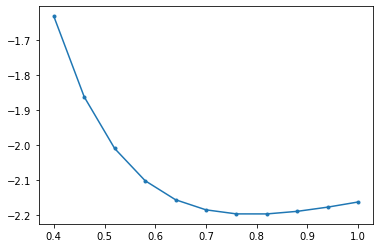

In [132]:
plt.plot(dlist,elist,'.-')